In [1]:
import numpy as np
import autogluon as ag
@ag.args(
    lr=ag.space.Real(1e-3, 1e-2, log=True),
     wd=ag.space.Real(1e-3, 1e-2))
def train_fn(args, reporter):
    print('lr: {}, wd: {}'.format(args.lr, args.wd))
    for e in range(10):
        dummy_accuracy = 1 - np.power(1.8, -np.random.uniform(e, 2*e))
        reporter(epoch=e+1, accuracy=dummy_accuracy, lr=args.lr, wd=args.wd)

/home/weiweia92/anaconda3/lib/python3.7/site-packages/mxnet/optimizer/optimizer.py:167: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  Optimizer.opt_registry[name].__name__))


**`ag.space.Real`**`(lower, upper,default=None,log=False)`:搜索连续值的超参数空间  

`log`:是否用对数的方式而不是线性方式搜索值的大小，`lr`一般用对数的形式搜索设为`log=True`  

**`ag.space.Int`**`(lower,upper,default=None)`:搜索整数值的超参数空间  
**`ag.space.Bool`**:搜索True或False的超参数空间  
`ag.Bool()` serves as shorthand for: `ag.space.Categorical(True, False)`

In [5]:
pretrained = ag.space.Bool() #eg

**`autogluon.space.Categorical(*data)`**

In [7]:
a = ag.space.Categorical('a', 'b', 'c', 'd') 

In [8]:
a

Categorical['a', 'b', 'c', 'd']

In [24]:
import autogluon as ag
from mxnet import optimizer as optim
@ag.obj(
     learning_rate=ag.space.Real(1e-4, 1e-1, log=True),
     wd=ag.space.Real(1e-4, 1e-1),
)

SyntaxError: unexpected EOF while parsing (<ipython-input-24-ef142219916e>, line 6)

In [10]:
b = ag.space.Categorical('resnet50', autogluon_obj())

In [11]:
b

Categorical['resnet50']

**`autogluon.space.List(*args)`**

In [12]:
sequence = ag.List(
    ag.space.Categorical('conv3x3', 'conv5x5', 'conv7x7'),
    ag.space.Categorical('BatchNorm', 'InstanceNorm'),
    ag.space.Categorical('relu', 'sigmoid'),
)

In [13]:
sequence

List[Categorical['conv3x3', 'conv5x5', 'conv7x7'], Categorical['BatchNorm', 'InstanceNorm'], Categorical['relu', 'sigmoid']]

**`autogluon.space.Dict(*\*\kwargs)`**

In [14]:
g = ag.space.Dict(
    hyperparam1 = ag.space.Categorical('alpha', 'beta'),
    hyperparam2 = ag.space.Int(0, 3)
)
print(g)

Dict{'hyperparam1': Categorical['alpha', 'beta'], 'hyperparam2': Int: lower=0, upper=3}


In [15]:
import autogluon as ag
@ag.obj(
        name=ag.space.Categorical('auto', 'gluon'),
        idx=ag.space.Int(0, 100),
)

class myobj:
    def __init__(self, name, idx):
        self.name = name
        self.idx = idx

@ag.func(framework=ag.space.Categorical('mxnet', 'pytorch'))
def myfunc(framework):
    return framework

In [2]:
scheduler = ag.scheduler.HyperbandScheduler(train_fn,
                                            resource={'num_cpus': 2, 'num_gpus': 0},
                                            num_trials=10,
                                            reward_attr='accuracy',
                                            time_attr='epoch',
                                            grace_period=1)
scheduler.join_jobs()
scheduler.join_jobs()

No handles with labels found to put in legend.


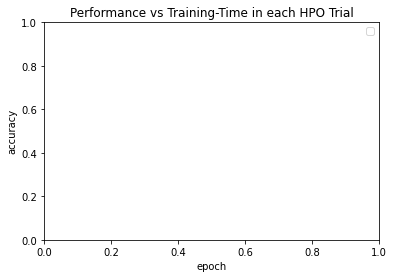

In [3]:
scheduler.get_training_curves(plot=True)